# Problem 1

## Context 

CNBE, a prominent news channel, is gearing up to provide insightful coverage of recent elections, recognizing the importance of data-driven analysis. A comprehensive survey has been conducted, capturing the perspectives of 1525 voters across various demographic and socio-economic factors. This dataset encompasses 9 variables, offering a rich source of information regarding voters' characteristics and preferences.

## Objective

The primary objective is to leverage machine learning to build a predictive model capable of forecasting which political party a voter is likely to support. This predictive model, developed based on the provided information, will serve as the foundation for creating an exit poll. The exit poll aims to contribute to the accurate prediction of the overall election outcomes, including determining which party is likely to secure the majority of seats.

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

## Define the problem and perform Exploratory Data Analysis

- Problem definition - Check shape, Data types, and statistical summary - Univariate analysis - Multivariate analysis - Use appropriate visualizations to identify the patterns and insights - Key meaningful observations on individual variables and the relationship between variables

In [5]:
data = pd.read_excel('Election_Data.xlsx')

In [7]:
data.shape

(1525, 10)

In [9]:
data.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [12]:
data.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [14]:
data.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

### Data Description

vote: Party choice: Conservative or Labour

age: in years

economic.cond.national: Assessment of current national economic conditions, 1 to 5.

economic.cond.household: Assessment of current household economic conditions, 1 to 5.

Blair: Assessment of the Labour leader, 1 to 5.

Hague: Assessment of the Conservative leader, 1 to 5.

Europe: an 11-point scale that measures respondents' attitudes toward European integration.   High scores represent ‘Eurosceptic’ sentiment.
political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

gender: female or male.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [18]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,NaN,NaN,NaN,763.0,440.373894,1.0,382.0,763.0,1144.0,1525.0
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Univariate Analysis

Before the analysis, let us remove unnecessary columns - for now we remove "Unnamed:0"

In [11]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
data.head(2)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male


In [42]:
data.shape

(1525, 9)

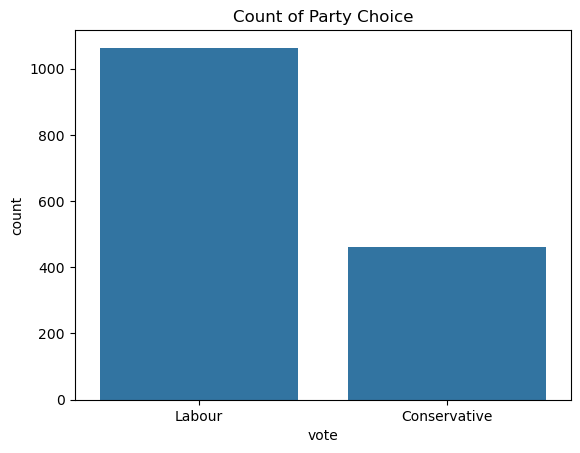

In [48]:
plt.title('Count of Party Choice')
sns.countplot(x='vote', data = data)
plt.show();

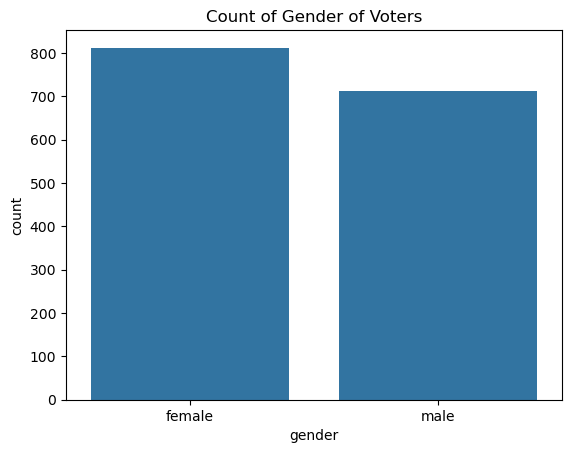

In [50]:
plt.title('Count of Gender of Voters')
sns.countplot(x='gender', data = data)
plt.show();

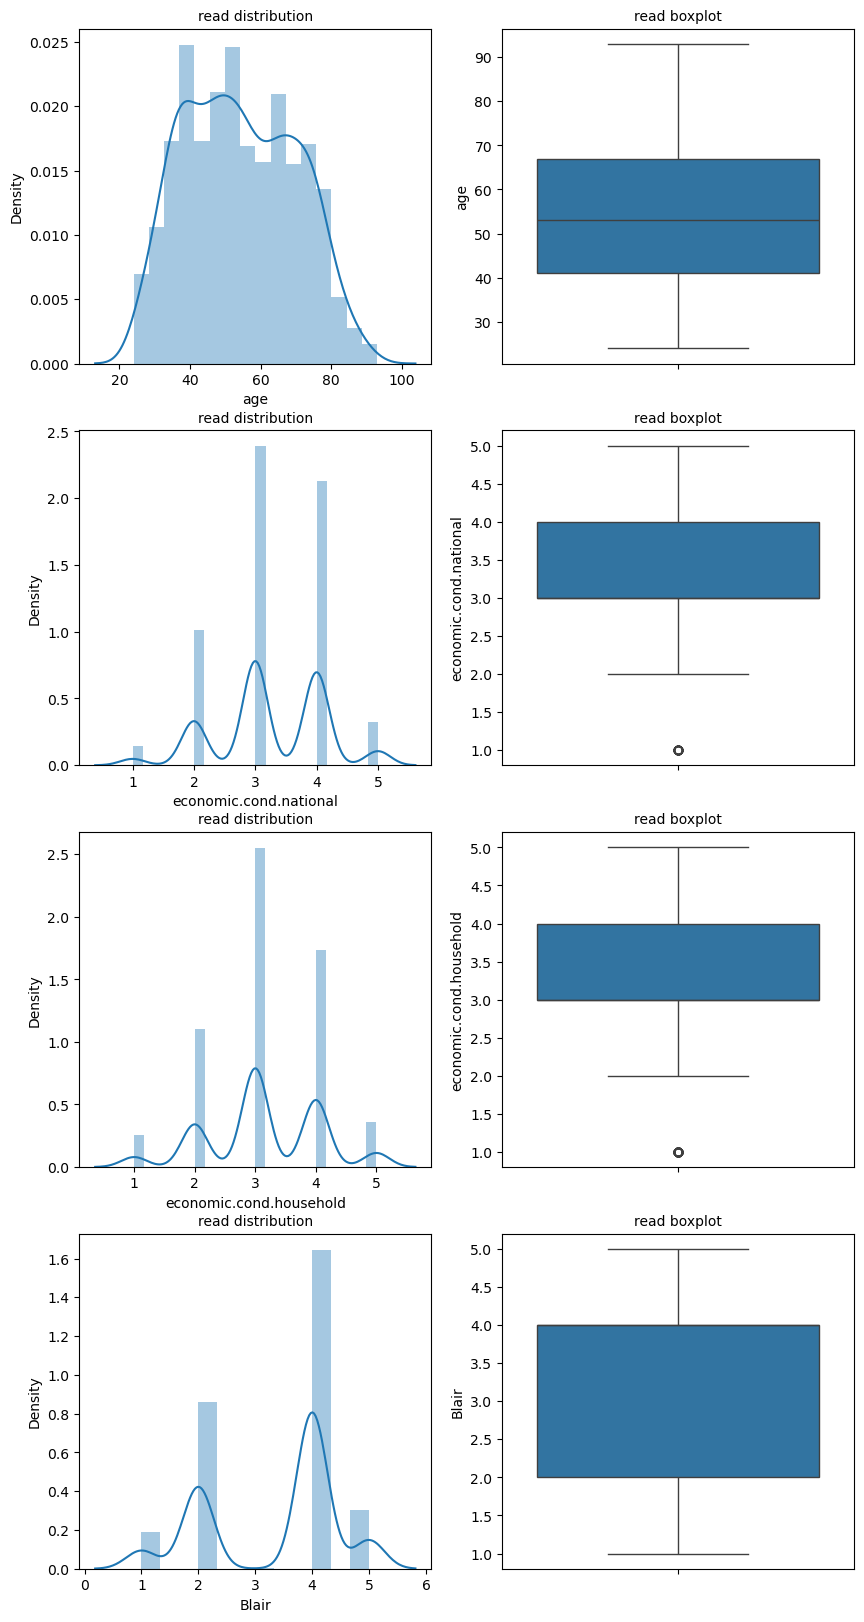

In [62]:
fig, axes = plt.subplots(nrows= 4, ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(data['age'], ax=axes[0][0])
a.set_title('read distribution', fontsize=10)

a = sns.boxplot(data['age'], orient='v', ax= axes[0][1])
a.set_title('read boxplot', fontsize = 10)

a = sns.distplot(data['economic.cond.national'], ax=axes[1][0])
a.set_title('read distribution', fontsize = 10)

a = sns.boxplot(data['economic.cond.national'], orient='v', ax= axes[1][1])
a.set_title('read boxplot', fontsize = 10)

a = sns.distplot(data['economic.cond.household'], ax=axes[2][0])
a.set_title('read distribution', fontsize = 10)

a = sns.boxplot(data['economic.cond.household'], orient='v', ax= axes[2][1])
a.set_title('read boxplot', fontsize = 10)

a = sns.distplot(data['Blair'], ax=axes[3][0])
a.set_title('read distribution', fontsize = 10)

a = sns.boxplot(data['Blair'], orient='v', ax= axes[3][1])
a.set_title('read boxplot', fontsize = 10)

plt.show()


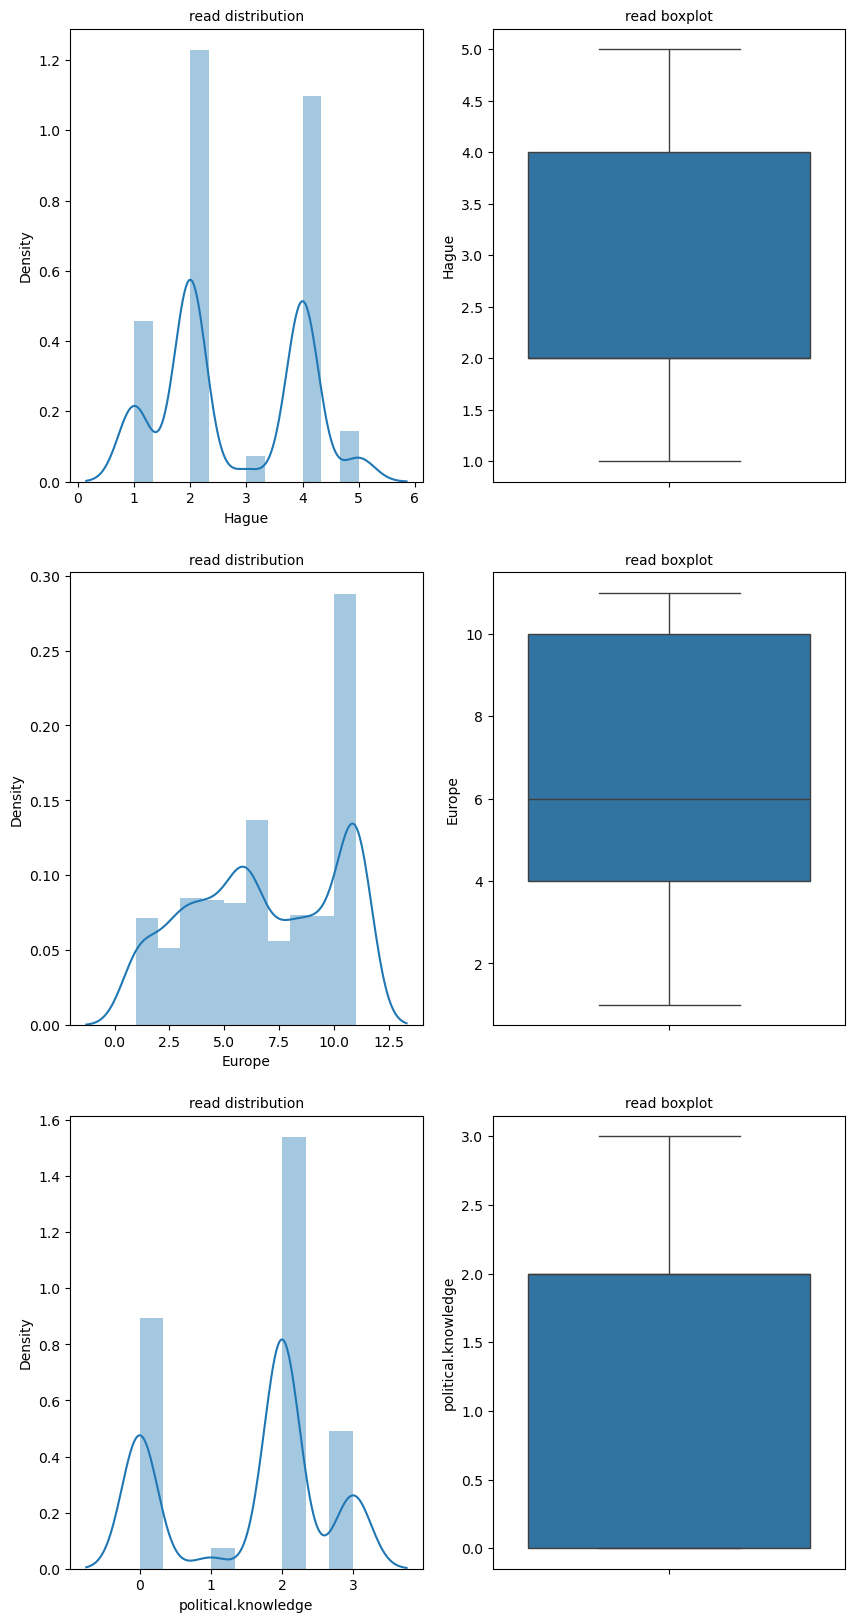

In [66]:
fig, axes = plt.subplots(nrows= 3, ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(data['Hague'], ax=axes[0][0])
a.set_title('read distribution', fontsize=10)

a = sns.boxplot(data['Hague'], orient='v', ax= axes[0][1])
a.set_title('read boxplot', fontsize = 10)

a = sns.distplot(data['Europe'], ax=axes[1][0])
a.set_title('read distribution', fontsize = 10)

a = sns.boxplot(data['Europe'], orient='v', ax= axes[1][1])
a.set_title('read boxplot', fontsize = 10)

a = sns.distplot(data['political.knowledge'], ax=axes[2][0])
a.set_title('read distribution', fontsize = 10)

a = sns.boxplot(data['political.knowledge'], orient='v', ax= axes[2][1])
a.set_title('read boxplot', fontsize = 10)

plt.show()


### Multivariate Analysis

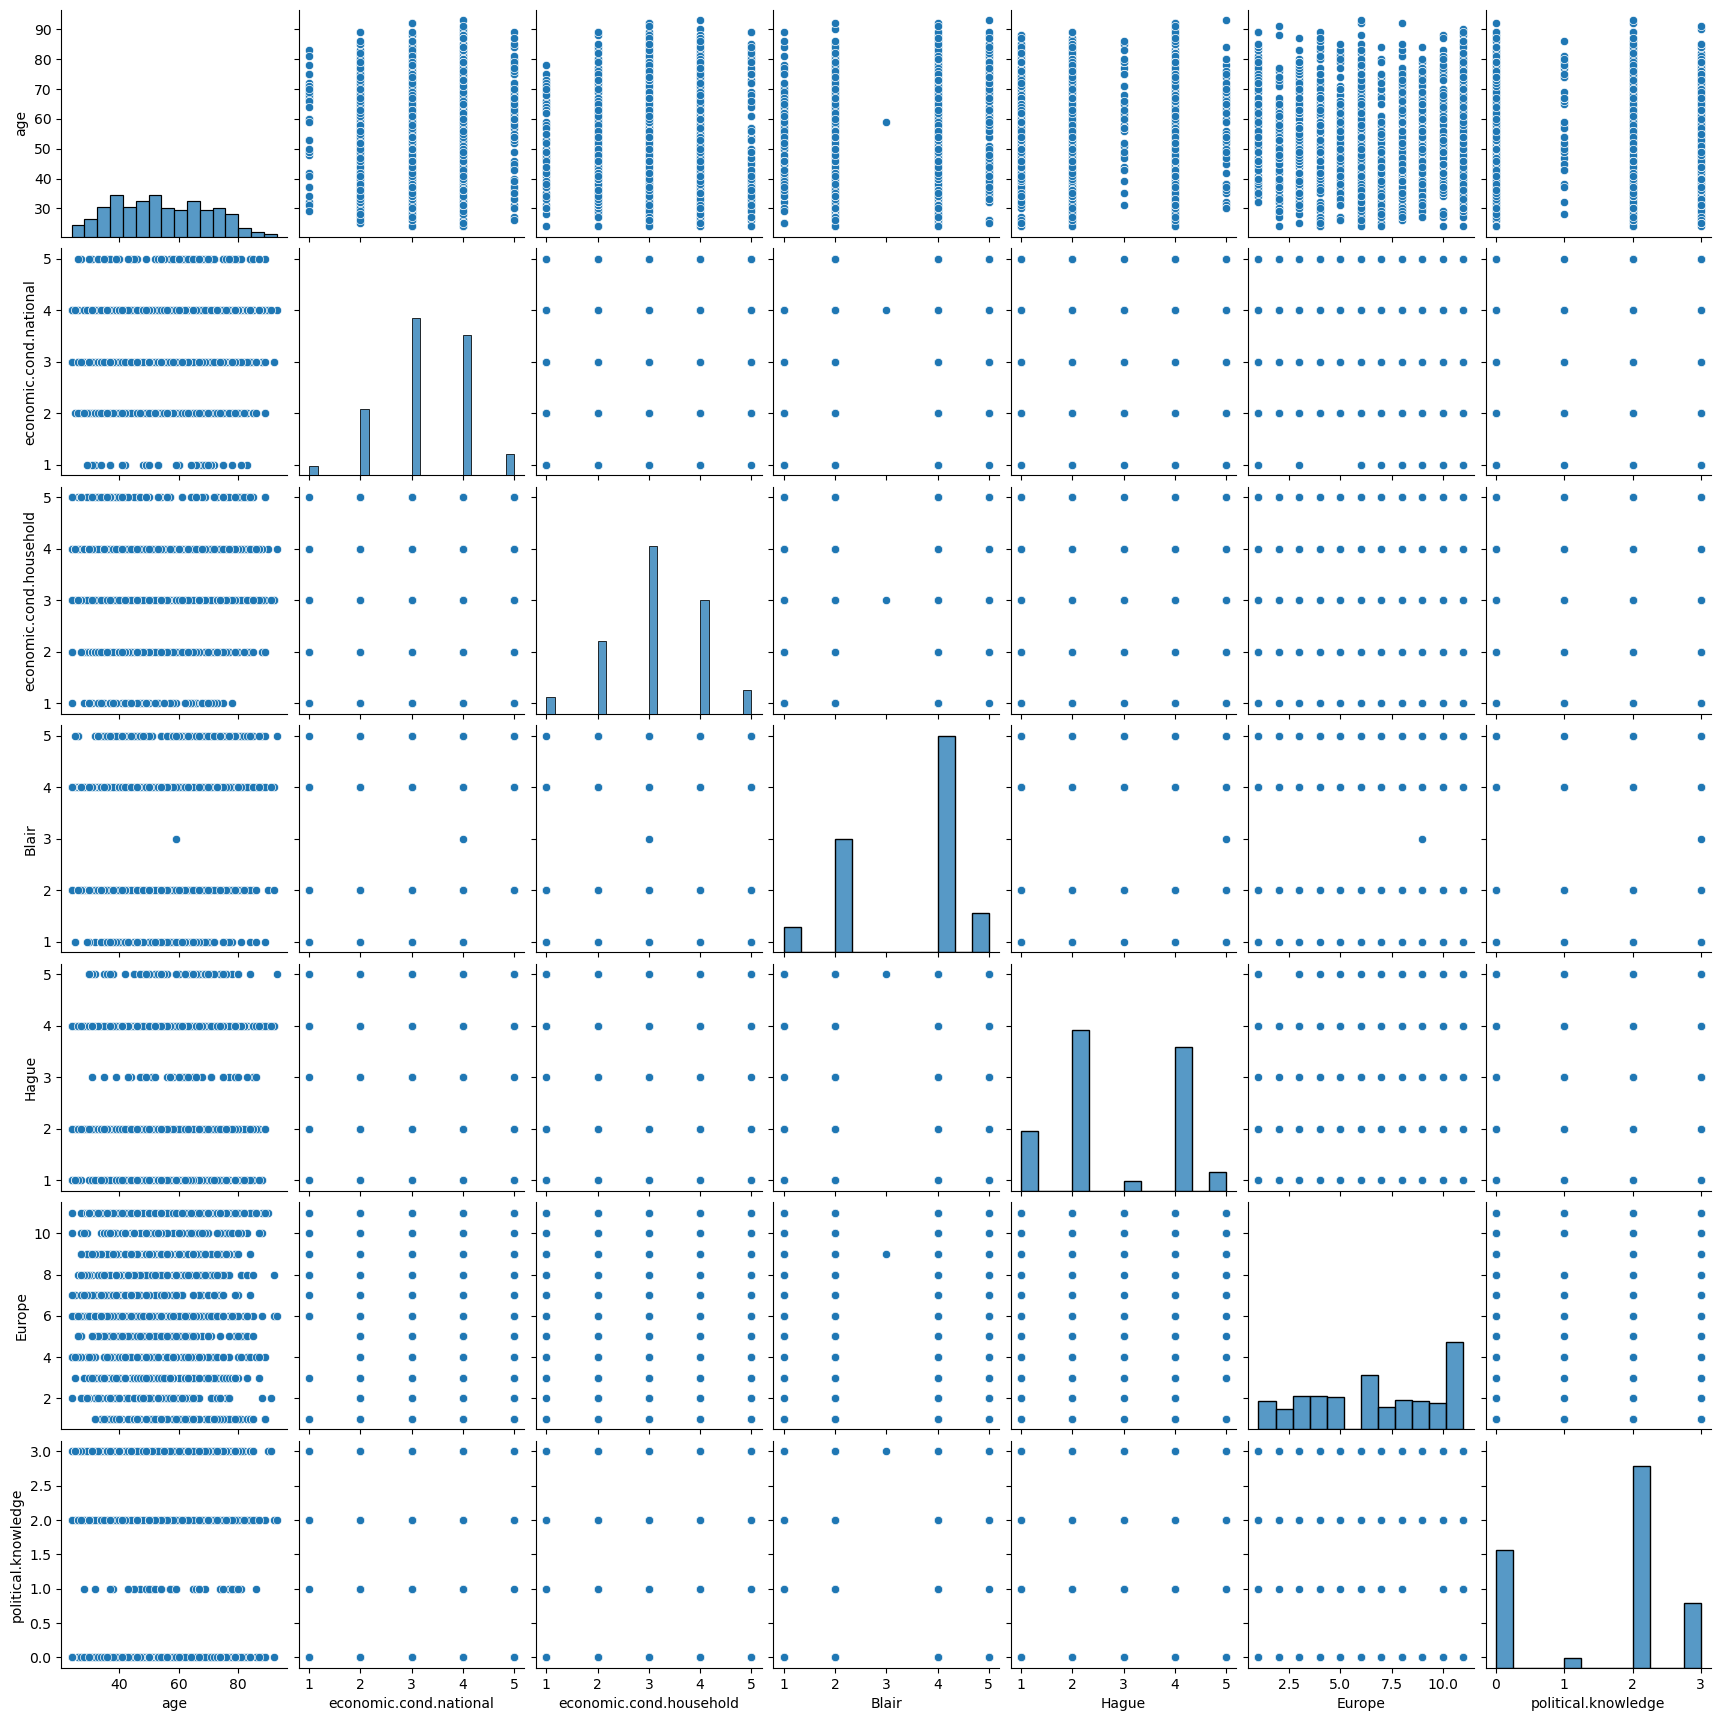

In [79]:
sns.pairplot(data);

In [15]:
data_num = data.select_dtypes('int64')
data_num.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
0,43,3,3,4,1,2,2
1,36,4,4,4,4,5,2
2,35,4,4,5,2,3,2
3,24,4,2,2,1,4,0
4,41,2,2,1,1,6,2


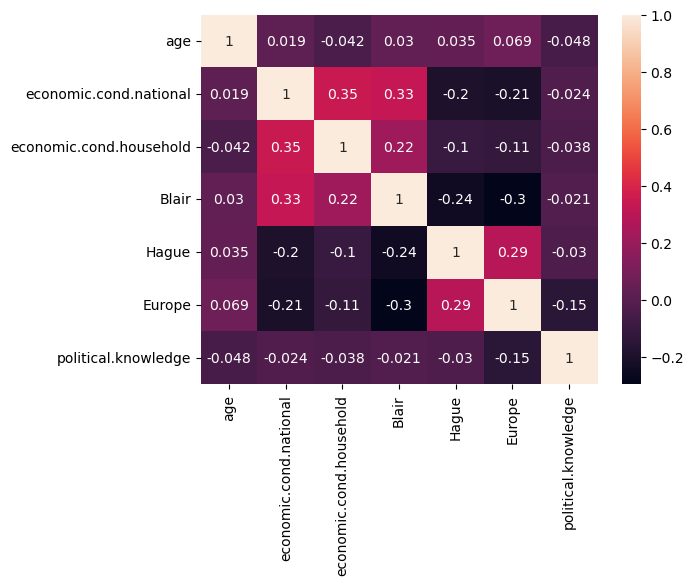

In [17]:
sns.heatmap(data_num.corr(), annot=True)
plt.show()

In [19]:
c = data_num.corr()
round(c,2)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.00,0.02,-0.04,0.03,0.03,0.07,-0.05
economic.cond.national,0.02,1.00,0.35,0.33,-0.20,-0.21,-0.02
economic.cond.household,-0.04,0.35,1.00,0.22,-0.10,-0.11,-0.04
Blair,0.03,0.33,0.22,1.00,-0.24,-0.30,-0.02
Hague,0.03,-0.20,-0.10,-0.24,1.00,0.29,-0.03
Europe,0.07,-0.21,-0.11,-0.30,0.29,1.00,-0.15
political.knowledge,-0.05,-0.02,-0.04,-0.02,-0.03,-0.15,1.00


### Data Pre-processing

Prepare the data for modelling: - Outlier Detection(treat, if needed)) - Encode the data - Data split - Scale the data (and state your reasons for scaling the features)

No need for outlier treatment because, the variables - economic.cond.national and economic.cond.household have max values as 5 and these are just lables. 

In [52]:
from sklearn import preprocessing 

In [48]:
data.head(2)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male


In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['vote']= label_encoder.fit_transform(data['vote'])
data['gender'] = label_encoder.fit_transform(data['gender'])


In [23]:
data.head(1)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0


In [25]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
X = data.drop('vote', axis=1)
y = data['vote']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [108]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1525 non-null   int64
 1   economic.cond.national   1525 non-null   int64
 2   economic.cond.household  1525 non-null   int64
 3   Blair                    1525 non-null   int64
 4   Hague                    1525 non-null   int64
 5   Europe                   1525 non-null   int64
 6   political.knowledge      1525 non-null   int64
 7   gender                   1525 non-null   int32
dtypes: int32(1), int64(7)
memory usage: 89.5 KB


### Model Building


- Metrics of Choice (Justify the evaluation metrics) - Model Building (KNN, Naive bayes, Bagging, Boosting) - Metrics of Choice (Justify the evaluation metrics) - Model Building (KNN, Naive bayes, Bagging, Boosting)

### Model Performance evaluation

- Check the confusion matrix and classification metrics for all the models (for both train and test dataset) - ROC-AUC score and plot the curve - Comment on all the model performance

### Naive Bayes Model 

In [129]:
data['vote'].value_counts(normalize=True)

vote
1    0.697049
0    0.302951
Name: proportion, dtype: float64

We can call this a balanced dataset. 

In [71]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [73]:
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

**Performance Matrix on train data set**

In [75]:
y_train_predict = NB_model.predict(x_train)
model_score = NB_model.score(x_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.8331771321462043
[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



**Performance Matrix on test data set**

In [59]:
y_test_predict = NB_model.predict(x_test)
model_score = NB_model.score(x_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

0.8253275109170306
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



Accuracy of Gaussian Naive Bayes model

In [41]:
NB_model.score(x_train, y_train)

0.8331771321462043

In [43]:
NB_model.score(x_test, y_test)

0.8253275109170306

AUC: 0.886


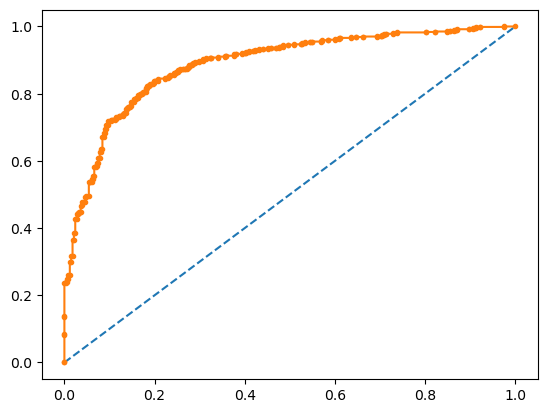

In [77]:
probs = NB_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

AUC: 0.885


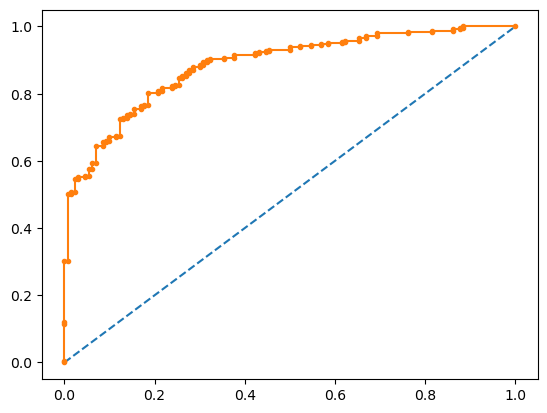

In [79]:
probs = NB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### KNN model

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [81]:
knn = knn.fit(x_train,y_train)

In [87]:
y_train_predict = knn.predict(x_train)
model_score = knn.score(x_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.8612933458294283
[[246  86]
 [ 62 673]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       332
           1       0.89      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.83      1067
weighted avg       0.86      0.86      0.86      1067



In [99]:
0.8612933458294283 - 0.7860262008733624

0.0752671449560659

as the difference between scores is less than 10%. This is a valid score.

In [91]:
y_train_predict = knn.predict(x_test)
model_score = knn.score(x_test, y_test)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))          ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))     ## classification_report

0.7860262008733624
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



AUC: 0.924


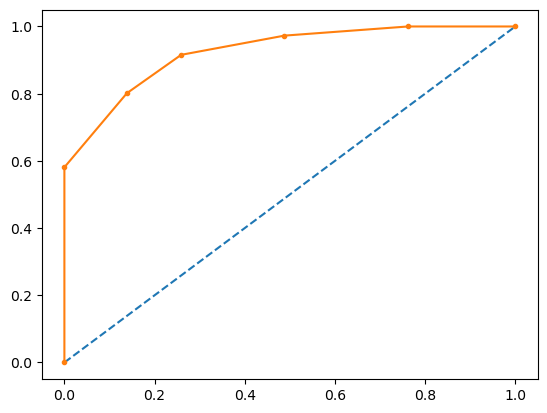

In [93]:
# AUC and ROC for the training data

# predict probabilities
probs = knn.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

AUC: 0.832


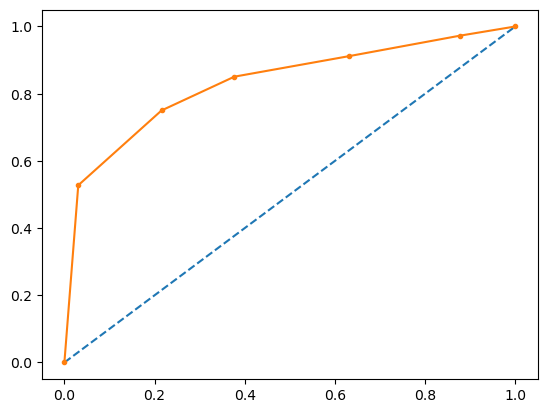

In [97]:
# predict probabilities for test data
probs = knn.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


### Ada Boost

In [133]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [135]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(x_train)
model_score = ADB_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8472352389878163
[[238  94]
 [ 69 666]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



In [137]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(x_test)
model_score = ADB_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8187772925764192
[[ 90  40]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



AUC: 0.913


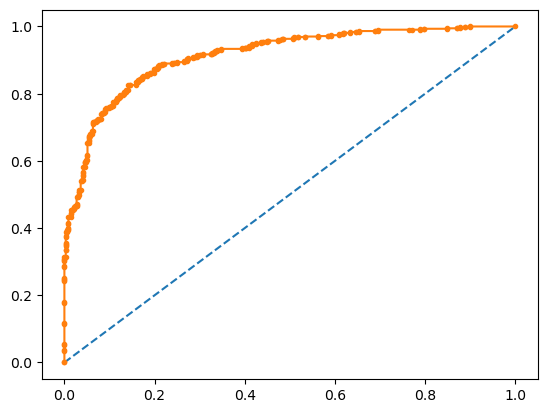

In [163]:
# AUC and ROC for the training data

# predict probabilities
probs = ADB_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

AUC: 0.879


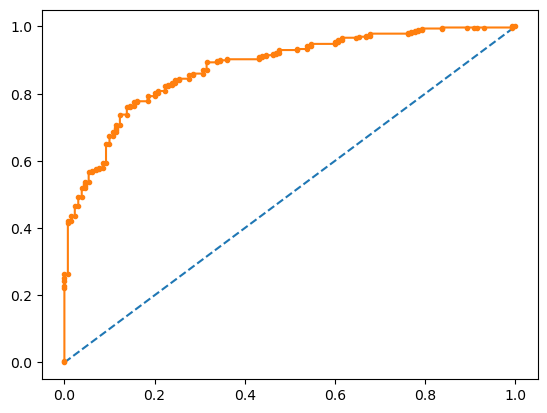

In [165]:
# predict probabilities for test data
probs = ADB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Gradient Boosting

In [144]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(x_train, y_train)

In [146]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(x_train)
model_score = gbcl.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8865979381443299
[[262  70]
 [ 51 684]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



In [148]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(x_test)
model_score = gbcl.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8318777292576419
[[ 96  34]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



AUC: 0.950


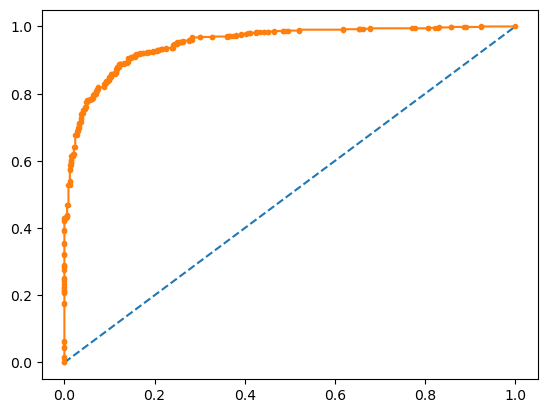

In [167]:
# AUC and ROC for the training data

# predict probabilities
probs = gbcl.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

AUC: 0.904


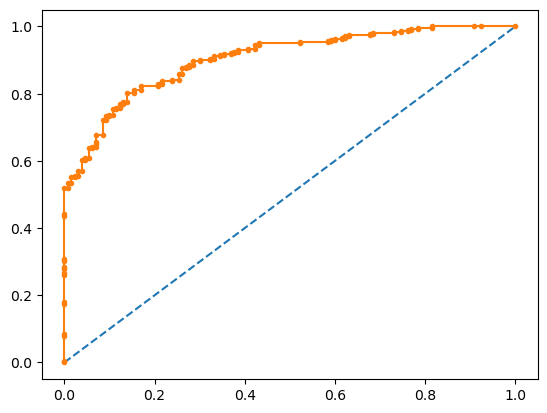

In [169]:
# predict probabilities for test data
probs = gbcl.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Bagging

In [155]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(n_estimators=100,random_state=1)
Bagging_model.fit(x_train, y_train)

BaggingClassifier(n_estimators=100, random_state=1)

In [157]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(x_train)
model_score =Bagging_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [159]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(x_test)
model_score = Bagging_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7969432314410481
[[ 83  47]
 [ 46 282]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       130
           1       0.86      0.86      0.86       328

    accuracy                           0.80       458
   macro avg       0.75      0.75      0.75       458
weighted avg       0.80      0.80      0.80       458



AUC: 1.000


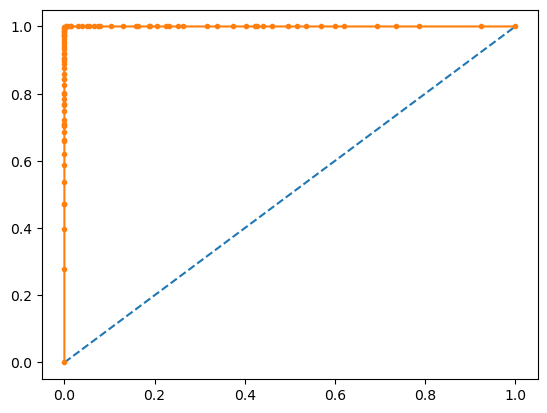

In [171]:
# AUC and ROC for the training data

# predict probabilities
probs = Bagging_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

AUC: 0.877


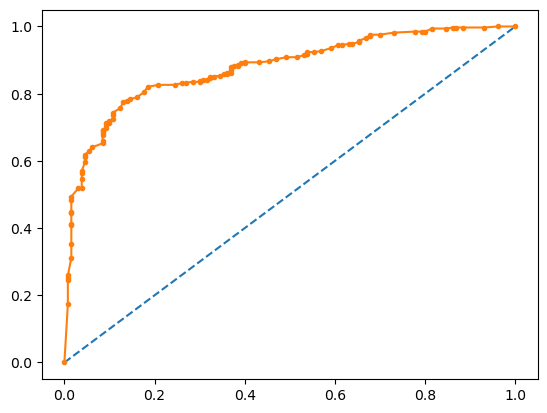

In [173]:
# predict probabilities for test data
probs = Bagging_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Comparison of performance by different models


Naive Bayes Model 

Accuracy - 0.8253275109170306

precision    recall  f1-score   support for test set. 

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458

precision    recall  f1-score   support for training set. 

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067

Accuracy - 0.8331771321462043

KNN model

precision    recall  f1-score   support for training set

           0       0.80      0.74      0.77       332
           1       0.89      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.83      1067
weighted avg       0.86      0.86      0.86      1067

Accuracy - 0.8612933458294283

precision    recall  f1-score   support for test set

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458

Accuracy - 0.7860262008733624

Ada Boost

precision    recall  f1-score   support for training set

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067

Accuracy - 0.8472352389878163

 precision    recall  f1-score   support for test set

           0       0.68      0.69      0.68       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458

accuracy - 0.8187772925764192

Gradient boosting

precision    recall  f1-score   support fro training set

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067

Accuracy - 0.8865979381443299

precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458

Accuracy - 0.8318777292576419

Bagging 

precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067

Accuracy - 0.9990627928772259

precision    recall  f1-score   support

           0       0.64      0.64      0.64       130
           1       0.86      0.86      0.86       328

    accuracy                           0.80       458
   macro avg       0.75      0.75      0.75       458
weighted avg       0.80      0.80      0.80       458

Accuracy - 0.7969432314410481







## Model Performance improvement

- Improve the model performance of bagging and boosting models by tuning the model - Comment on the model performance improvement on training and test data

In [179]:
!pip install imbalanced-learn

In [181]:
from imblearn.over_sampling import SMOTE

In [183]:
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

In [185]:
x_train_res.shape

(1470, 8)

**Naive Bayes with SMOTE**

In [242]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(x_train_res, y_train_res)

GaussianNB()

In [244]:
y_train_predict = NB_SM_model.predict(x_train_res)
model_score = NB_SM_model.score(x_train_res, y_train_res)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train_res, y_train_predict))     ## classification_report

0.8244897959183674
[[596 139]
 [119 616]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       735
           1       0.82      0.84      0.83       735

    accuracy                           0.82      1470
   macro avg       0.82      0.82      0.82      1470
weighted avg       0.82      0.82      0.82      1470



In [246]:
y_test_predict = NB_SM_model.predict(x_test)
model_score = NB_SM_model.score(x_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report



0.7991266375545851
[[103  27]
 [ 65 263]]
              precision    recall  f1-score   support

           0       0.61      0.79      0.69       130
           1       0.91      0.80      0.85       328

    accuracy                           0.80       458
   macro avg       0.76      0.80      0.77       458
weighted avg       0.82      0.80      0.81       458



In [258]:
# overfit for class 0 by 13%

**KNN with SMOTE**


In [203]:
knn_SM = KNeighborsClassifier(n_neighbors = 5)
knn_SM = knn.fit(x_train_res,y_train_res)


In [205]:
y_train_predict = knn_SM.predict(x_train_res)
model_score = knn_SM.score(x_train_res, y_train_res)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train_res, y_train_predict))     ## classification_report


0.8299319727891157
[[652  83]
 [167 568]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       735
           1       0.87      0.77      0.82       735

    accuracy                           0.83      1470
   macro avg       0.83      0.83      0.83      1470
weighted avg       0.83      0.83      0.83      1470



In [207]:
y_train_predict = knn_SM.predict(x_test)
model_score = knn_SM.score(x_test, y_test)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))          ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))     ## classification_report


0.7620087336244541
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



In [260]:
# overfit for class 0 by 14%

**Gradient Boosting with SMOTE**

In [236]:
gbcl_SM = GradientBoostingClassifier(random_state=1)
gbcl_SM = gbcl.fit(x_train_res, y_train_res)


In [238]:
y_train_predict = gbcl_SM.predict(x_train_res)
model_score = gbcl_SM.score(x_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.9027210884353741
[[674  61]
 [ 82 653]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       735
           1       0.91      0.89      0.90       735

    accuracy                           0.90      1470
   macro avg       0.90      0.90      0.90      1470
weighted avg       0.90      0.90      0.90      1470



In [240]:
y_test_predict = gbcl_SM.predict(x_test)
model_score = gbcl_SM.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8078602620087336
[[103  27]
 [ 61 267]]
              precision    recall  f1-score   support

           0       0.63      0.79      0.70       130
           1       0.91      0.81      0.86       328

    accuracy                           0.81       458
   macro avg       0.77      0.80      0.78       458
weighted avg       0.83      0.81      0.81       458



In [264]:
# overfit for class 0 by 20% 

**Ada Boost with SMOTE**

In [230]:
ADB_SM_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_SM_model.fit(x_train_res,y_train_res)


AdaBoostClassifier(n_estimators=100, random_state=1)

In [232]:
y_train_predict = ADB_SM_model.predict(x_train_res)
model_score = ADB_SM_model.score(x_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))


0.8551020408163266
[[632 103]
 [110 625]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       735
           1       0.86      0.85      0.85       735

    accuracy                           0.86      1470
   macro avg       0.86      0.86      0.86      1470
weighted avg       0.86      0.86      0.86      1470



In [234]:
y_test_predict = ADB_SM_model.predict(x_test)
model_score = ADB_SM_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8013100436681223
[[100  30]
 [ 61 267]]
              precision    recall  f1-score   support

           0       0.62      0.77      0.69       130
           1       0.90      0.81      0.85       328

    accuracy                           0.80       458
   macro avg       0.76      0.79      0.77       458
weighted avg       0.82      0.80      0.81       458



In [266]:
# overfit for class 0 by 17%

**Bagging witn SMOTE**

In [226]:
Bagging_SM_model=BaggingClassifier(n_estimators=100,random_state=1)
Bagging_SM_model.fit(x_train_res, y_train_res)


BaggingClassifier(n_estimators=100, random_state=1)

In [228]:
y_train_predict = Bagging_SM_model.predict(x_train_res)
model_score =Bagging_SM_model.score(x_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))


0.998639455782313
[[733   2]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       735
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1470
   macro avg       1.00      1.00      1.00      1470
weighted avg       1.00      1.00      1.00      1470



In [248]:
y_test_predict = Bagging_SM_model.predict(x_test)
model_score = Bagging_SM_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8056768558951966
[[ 96  34]
 [ 55 273]]
              precision    recall  f1-score   support

           0       0.64      0.74      0.68       130
           1       0.89      0.83      0.86       328

    accuracy                           0.81       458
   macro avg       0.76      0.79      0.77       458
weighted avg       0.82      0.81      0.81       458



In [268]:
# Bagging model is overfit. 

**We  finalize the Naive Bayes model.**

# Problem 2 

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973

In [286]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/301.4 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/301.4 kB ? eta -:--:--
   -------------- ----------------------- 112.6/301.4 kB 930.9 kB/s eta 0:00:01
   ---------------------------------------  297.0/301.4 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.7 MB/s eta 0:00:00


In [288]:
import re
import nltk 
import string
from nltk.corpus import inaugural
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [290]:
nltk.download('inaugural')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Bhamini\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bhamini\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bhamini\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [294]:
speeches = {
    "Roosevelt_1941": inaugural.raw('1941-Roosevelt.txt'),
    "Kennedy_1961": inaugural.raw('1961-Kennedy.txt'),
    "Nixon_1973": inaugural.raw('1973-Nixon.txt')
}

In [296]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

In [378]:
def analyze_speech(speech):
    characters = len(speech)
    words = word_tokenize(speech)
    sentences = sent_tokenize(speech)

    # Remove stopwords and perform stemming
    filtered_words = [ps.stem(word.lower()) for word in speeches if word.isalnum() and word.lower() not in stop_words]

    # Frequency distribution
    freq_dist = FreqDist(filtered_words)

    return {
        "characters": characters,
        "word_count": len(words),
        "sentence_count": len(sentences),
        "most_common_words": freq_dist.most_common(3),
        "filtered_words": filtered_words
    }
    

In [380]:
# Analyze each speech
analysis_results = {president: analyze_speech(speech) for president, speech in speeches.items()}


In [382]:
# Print analysis results
for president, analysis in analysis_results.items():
    print(f"\nAnalysis for {president}:")
    print(f"Number of characters: {analysis['characters']}")
    print(f"Number of words: {analysis['word_count']}")
    print(f"Number of sentences: {analysis['sentence_count']}")
    print(f"3 most common words: {analysis['most_common_words']}")



Analysis for Roosevelt_1941:
Number of characters: 7571
Number of words: 1526
Number of sentences: 68
3 most common words: []

Analysis for Kennedy_1961:
Number of characters: 7618
Number of words: 1543
Number of sentences: 52
3 most common words: []

Analysis for Nixon_1973:
Number of characters: 9991
Number of words: 2006
Number of sentences: 68
3 most common words: []


In [354]:
pip install nltk wordcloud matplotlib


Note: you may need to restart the kernel to use updated packages.



Top 3 most common words in Roosevelt_1941's speech:
[('nation', 17), ('know', 10), ('peopl', 9)]


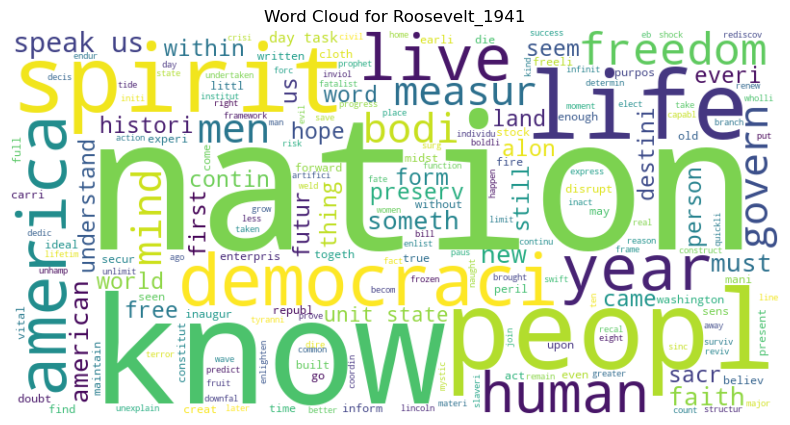


Top 3 most common words in Kennedy_1961's speech:
[('let', 16), ('us', 12), ('power', 9)]


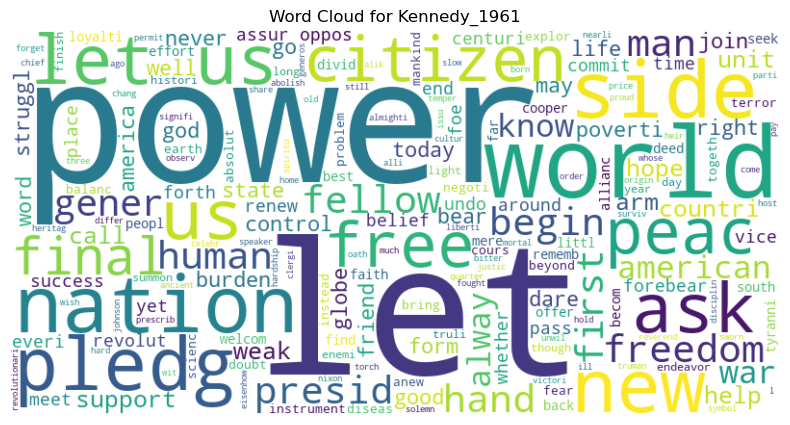


Top 3 most common words in Nixon_1973's speech:
[('us', 26), ('let', 22), ('america', 21)]


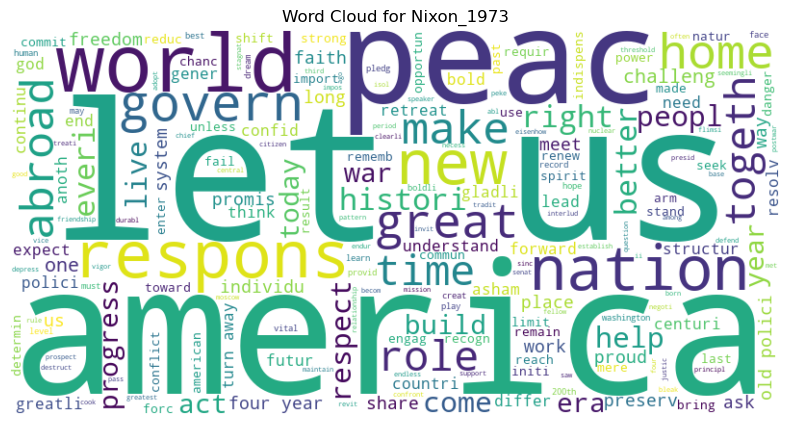

In [368]:
# Analyze each speech and generate word clouds
for president, speech in speeches.items():
    top_three_words, filtered_words = analyze_speech(speech)
    
    print(f"\nTop 3 most common words in {president}'s speech:")
    print(top_three_words)

    # Generate and display the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {president}')
    plt.show()